In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.

Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.

Gender: indicates the gender of the person making the transaction.

Age: indicates the age group of the person making the transaction.

Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

Marital_Status: is 0 if the user is not married and 1 otherwise.

Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

Purchase: Purchase amount.

**Колонку Purchase мы должны научиться предсказывать**

In [ ]:
plt.style.use('dark_background')

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1JVVkVH5PysaGwULKZKFRVZTc6n4psAvW')

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.580551,13.593517,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.241812,2.360842,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,14.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,14.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Видим, что в колонках Product_Category_2 и Product_Category_3 есть пропущенные значения. Заменим пропущенные значения в колонках модами.

In [ ]:
median_Product_Category_2 = data['Product_Category_2'].mode()

In [ ]:
median_Product_Category_3 = data['Product_Category_3'].mode()

In [ ]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(median_Product_Category_2)

In [ ]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(median_Product_Category_3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Построим гистограмму распределения возраста покупателей 

<Axes: >

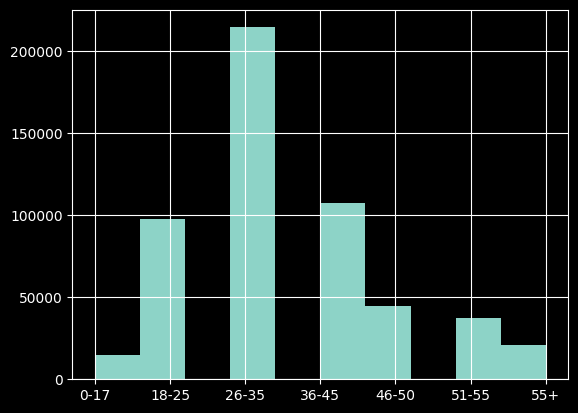

In [ ]:
data['Age'].sort_values().hist()

Видим, что большинство покупателей находятся в возрастном диапазоне 26-35

# Наведем порядок в данных

In [ ]:
data = data.drop(['Product_ID','User_ID'],axis=1)

In [ ]:
df_Gender = pd.get_dummies(data['Gender'])
df_Age = pd.get_dummies(data['Age'])
df_City_Category = pd.get_dummies(data['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(data['Stay_In_Current_City_Years'])

data_final= pd.concat([data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

In [ ]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years', 'F'],axis=1)
data_final = data_final.rename(columns = {'M' : 'Sex'})
data_final.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Приступим к обучению модели CatBoost

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor()

grid = {'learning_rate': np.arange(0.01, 0.11, 0.03),
        'depth': np.arange(2, 5, 1),
        'l2_leaf_reg': [1, 3, 5, 7]}

grid_search_result = model.grid_search(grid, 
                                       X=x_train, 
                                       y=y_train, 
                                       plot=True)


# Get predictions
predictions = model.predict(x_test)

# Проведем оценку точности предсказаний нашей модели

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 2192.4305662775846
MSE: 8479279.569021696
